### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 유 형 : 지도학습 + 분류

(1) 모듈 로딩 & 데이터 준비

In [2]:
import pandas as pd                                    # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier     # 기계 학습 관련 모듈
import matplotlib.pyplot as plt

In [3]:
data_file = '../data/fish.csv'

In [4]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [5]:
# Bream, Smelt 품종 행만 추출
twofishDF = fishDF[fishDF['Species'].isin(['Bream','Smelt'])]  # Boolean Indexing

# 해당 행만 도출
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [6]:
twofishDF.reset_index(drop = True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리

In [7]:
# Bream, Smelt를 수치화
# Bream => 0, Smelt => 1로 값 변환
twofishDF['Species'] = twofishDF['Species'].replace({'Bream':0,'Smelt':1}).copy()

C:\Users\wjs31\AppData\Local\Temp\ipykernel_42464\1510856585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['Species'] = twofishDF['Species'].replace({'Bream':0,'Smelt':1}).copy()


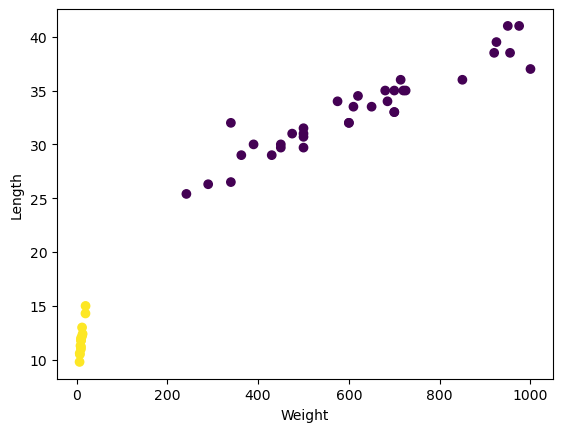

In [8]:
# Weight, Length로 품종 구별이 가능한지 시각화
plt.scatter(twofishDF['Weight'], twofishDF['Length'], c = twofishDF['Species'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(3) 기계학습을 위한 데이터 준비 
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋     : 80%
- 테스트용 데이터셋   : 20%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [9]:
# 데이터 섞기 => 100% 모두 섞기
twofishDF = twofishDF.sample(frac = 1.)
twofishDF

,Species,Weight,Length
7,0,390.0,30.0
45,1,13.4,12.4
3,0,363.0,29.0
1,0,290.0,26.3
33,0,975.0,41.0
18,0,610.0,33.5
21,0,685.0,34.0
34,0,950.0,41.0
14,0,600.0,32.0
24,0,700.0,35.0


In [10]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twofishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twofishDF.iloc[:num+1]

# 테스트 데이터셋 추출
testDF = twofishDF.iloc[num+1:]
trainDF

,Species,Weight,Length
7,0,390.0,30.0
45,1,13.4,12.4
3,0,363.0,29.0
1,0,290.0,26.3
33,0,975.0,41.0
18,0,610.0,33.5
21,0,685.0,34.0
34,0,950.0,41.0
14,0,600.0,32.0
24,0,700.0,35.0


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비 
- 추가 모듈 로딩
- 비율 설정 없이 학습/테스트셋 분리
- [전달] 피쳐 데이터, 타겟 데이터
- [기본] shuffle = True, train:test = 0.75 : 0.25
- [설정] train:test = 0.8 : 0.2 => test_size, train_size 매개변수 값 설정
- 분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟  

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 특성과 타겟 분리
featureDF = twofishDF[twofishDF.columns[1:]]
targetSR = twofishDF['Species']

In [13]:
# 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟  
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR)

In [14]:
# train : test = 0.8 : 0.2
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, test_size = 0.2)
# xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, train_size = 0.8) - 위와 동일 -> 둘 중 하나 사용

In [15]:
# target 비율 맞추기
xTrain,xTest,yTrain,yTest = train_test_split(featureDF,targetSR, test_size = 0.2, stratify=targetSR)

In [16]:
### 검증용 데이터셋 준비 -> 학습용 데이터셋에서 분리
xTrain,xVal,yTrain,yVal = train_test_split(xTrain,yTrain, test_size = 0.1, stratify=yTrain)

(4) 학습 진행
- 학습 방법 : 지도학습 + 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [17]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [18]:
# 학습 진행 => 학습용 데이터로 진행
model.fit(xTrain,yTrain)

KNeighborsClassifier()

(5) 테스트 진행
- 학습에 사용되지 않은 데이터로 진행
- score() 메서드

In [19]:
model.score(xVal,yVal)

1.0

(6) 모델 활용 예측
- 새로운 데이터로 진행( 테스트용 데이터셋 )

In [20]:
model.predict(xTest)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
yTest

45    1
48    1
12    0
15    0
40    1
25    0
21    0
32    0
33    0
30    0
Name: Species, dtype: int64